In [21]:
import numpy as np
import matplotlib.pyplot as plt
from gendat2_python import gendat2
from gendat2_python_angel import gendat2_angel

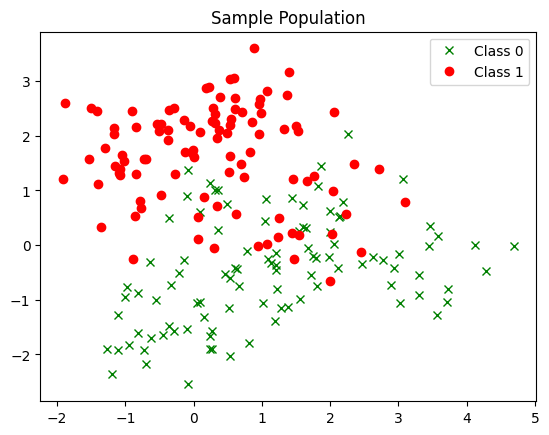

In [22]:
# loads the sample data where x0,y0 represents class 0 and x1,y1 represents class 1
x0, y0, x1, y1 = np.loadtxt('classasgntrain1.dat').T
N0 = x0.size
N1 = x1.size
N = N0 + N1
# this just plots the sample/given data
fig, ax = plt.subplots()
ax.plot(x0, y0, 'gx', label='Class 0')
ax.plot(x1, y1, 'ro', label='Class 1')
ax.legend()
plt.title("Sample Population")
plt.show()

In [23]:
x0, y0, x1, y1 = np.loadtxt('classasgntrain1.dat').T
# x0 = np.array([x0,y0])
# x1 = np.array([x1,y1])
print(f'x0: {x0.shape}')
print(f'x1: {x1.shape}')
print(f'N: {N}')

x0: (100,)
x1: (100,)
N: 200


In [24]:
# Build the X matrix
class_0_matrix = np.array([np.ones(N0), x0, y0]).T
class_1_matrix = np.array([np.ones(N1), x1, y1]).T
X_aug = np.concatenate((class_0_matrix, class_1_matrix), axis=0)
# Build the indicator response matrix 
Y0_array = np.array([np.ones(N0), np.zeros(N0)]).T
Y1_array = np.array([np.zeros(N1), np.ones(N1)]).T
Y = np.concatenate((Y0_array, Y1_array), axis=0)
# print(f'class_0_matrix: {class_0_matrix.shape}')
# print(f'class_1_matrix: {class_1_matrix.shape}')
print(f'X_aug: {X_aug.shape}')
print(f'Y: {Y.shape}')

X_aug: (200, 3)
Y: (200, 2)


In [25]:
# Find the parameter matrix
# Bhat = (X'*X) \ X'* Y;
Bhat = np.dot(np.dot(np.linalg.pinv(np.dot(X_aug.T, X_aug)), X_aug.T), Y)
# Find the approximate response
Yhat = np.dot(X_aug, Bhat)
Yhathard = Yhat > 0.5 # threshold into different classes
nerr = np.divide(np.sum(np.sum(np.absolute(Yhathard - Y))), 2); # count the total number of errors 
errrate_linregress_train = np.divide(nerr,N) 
print(f'Bhat: {Bhat.shape}')
print(f'Yhat: {Yhat.shape}')
print(f'errrate_linregress_train: {errrate_linregress_train}')


Bhat: (3, 2)
Yhat: (200, 2)
errrate_linregress_train: 0.145


In [26]:
# Now test on new (testing data)
Ntest0 = 5000 # number of class 0 points to generate
Ntest1 = 5000 # number of class 1 points to generate
xtest0 = gendat2_angel(0,Ntest0) # generate the test data for class 0 
xtest1 = gendat2_angel(1,Ntest1) # generate the test data for class 1 
print(f'xtest0: {xtest0.shape}')
print(f'xtest1: {xtest1.shape}')

xtest0: (2, 5000)
xtest1: (2, 5000)


In [27]:
nerr = 0
for i in range(Ntest0):
    # get xtest0[:,i]
    temp = xtest0.copy()
    temp = temp[:,i]
    yhat = np.dot(np.array([1, temp[0], temp[1]]), Bhat)
    if yhat[1] > yhat[0]: # error: chose class 0 over class 1
        nerr += 1
for i in range(Ntest1):
    # get xtest1[:,i]
    temp = xtest1.copy()
    temp = temp[:,i]
    yhat = np.dot(np.array([1, temp[0], temp[1]]), Bhat)
    if yhat[0] > yhat[1]: # error: chose class 0 over class 1
        nerr += 1
errrate_linregress_test = nerr / (Ntest0 + Ntest1)


In [28]:
# Get minimum and maximum values for all x and all y
class_0 = np.array([x0, y0])
class_1 = np.array([x1, y1])
x_values = np.concatenate((x0, x1))
y_values = np.concatenate((y0, y1))
xmin = np.min(x_values)
xmax = np.max(x_values)
ymin = np.min(y_values)
ymax = np.max(y_values)
print(f'xmin: {xmin}')
print(f'xmax: {xmax}')
xpl = np.linspace(xmin,xmax,100)
ypl = np.linspace(ymin,ymax,100)
# Make classification regions
# For each class, make array with 2 rows
redpts = np.array([[],[]]); # class 1 estimates
greenpts = np.array([[],[]]);# class 0 estimatees
for x in xpl:
    for y in ypl:
        yhat = np.dot(np.array([1, x, y]), Bhat)
        # Get [x;y] as column 
        xy_array = np.array([[x], [y]])
        # print(f'xy_array: {xy_array.shape}')
        if yhat[0] > yhat[1]: # choose class 0
            greenpts = np.append(greenpts, xy_array, axis=1)
        else: # choose class 1
            redpts = np.append(redpts, xy_array, axis=1)
print(f'greenpts: {greenpts.shape}')
print(f'redpts: {redpts.shape}') 


xmin: -1.918
xmax: 4.6887
greenpts: (2, 5432)
redpts: (2, 4568)


xtest0: (2, 5000)
xtest1: (2, 5000)
xtest1: (2, 5432)


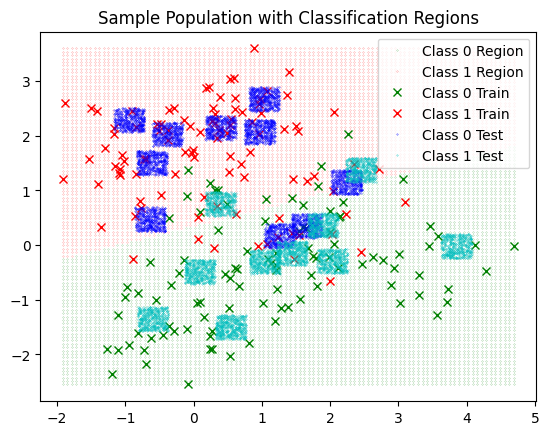

In [29]:
print(f'xtest0: {xtest0.shape}')
print(f'xtest1: {xtest1.shape}')
print(f'greenpts: {greenpts.shape}')
fig, ax = plt.subplots()
# Plot the performance across the window (that is, plot the classification regions)
ax.plot(greenpts[0,:], greenpts[1,:], 'g.', label='Class 0 Region', markersize=0.25)
ax.plot(redpts[0,:], redpts[1,:], 'r.', label='Class 1 Region', markersize=0.25)
# Plot training data for class 0 and class 1
ax.plot(x0, y0, 'gx', label='Class 0 Train')
ax.plot(x1, y1, 'rx', label='Class 1 Train')
# Plot test dat for class 0 and class 1
ax.plot(xtest0[0,:], xtest0[1,:], 'b.', label='Class 0 Test', markersize=0.50)
ax.plot(xtest1[0,:], xtest1[1,:], 'c.', label='Class 1 Test', markersize=0.50)
ax.legend()
plt.title("Sample Population with Classification Regions")
plt.show()  